# A taste of data science
and why we start from Numpy, pandas, and matplotlib...

Let's import some required packages first.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Get data
One of the most convenient  
and unrealistic way to read the data  
is by built-in functions of packages.

For example, you can do 
```Python
from sklearn.datasets import <tab>
```
Here `<tab>` means to press the tab key there.

In [8]:
from sklearn.datasets import load_iris
iris = load_iris() ### load the dataset and store it into the namespace `iris`

Now what?

Different datasets have different structures.  
Usually, the peopl who give you the data need to  
tell you the details.

For data accessed by the `sklearn` (scikit-learn) package,  
each data has its own keys.

In [9]:
print(iris.keys())

### The general description is stored in `iris`
### and can be access by `iris['DESCR']`
print(iris['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

In [10]:
X = iris['data']
y = iris['target']
### uncomment the following lines to 
### understand X and y
# print(X)
# print(y)

In computer, data is usually stored in an array.  
A sample of the data is no different from a collection of numbers.

It is important to understand  
how many **samples** (rows) there are, and  
how many **features** (columns) there are.

In [11]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


So in this case, 
you understand there are 150 samples of iris flowers are given, and  
for each sample, 4 features are recorded.

`iris['target']` record the species of each sample,  
they are the answers, the **targets**, or the **labels**.

`iris['target_names']` tells you the meaning of each target.

In [12]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

As you have seen, 
the structure of the data is important.

The real-world data is unlikely to be as clean as this.

You might be dealing with:  
- pictures of different resolutions (input dimensions)
- pictures with noise (inevitable)
- text with redundant information or redundant formating (e.g., collecting the gender data by Word)
- and so on.

Processing and cleaning the data is important  
and has lots of dirty work involved.  

However, a good project requires  
a smooth cooperation between several reliable works,  
such as 
- collecting the data,
- cleaning the data, 
- analyze the data, 
- data visualization and selling it out.

Each step is important while data analysis  
counts only a tiny proportion.

## Support-vector machine

Find a cutting line (hyperplane) between  
data points form different categories.

![Illustration of support-vector machine](256px-SVM_margin.png "Illustration of support-vector machine")
(Source: Wikipedia &mdash; Support-vector machine)  
(Larhmam [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0))

Let have a glance of the data points.

Think about what are `X[:,0]` and `X[:,1]`.  

You may also try combinations other than 0 and 1.  
For example, you may try 1 and 2.

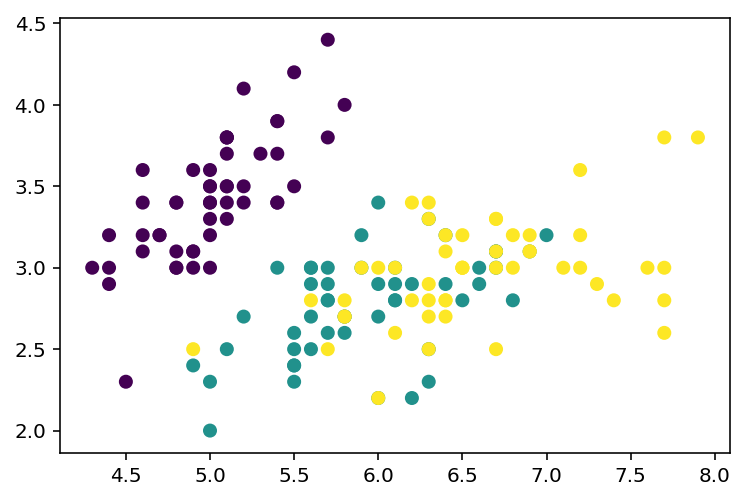

In [13]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

Let's apply SVM anyway  
(without understanding what is going on).

In [14]:
from sklearn.svm import SVC
model = SVC() ### create a support-vector classifier
model.fit(X, y) ### adjust the parameters of the model to fit the data
ymodel = model.predict(X) ### parameters are fixed now, use them to predict the answer

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
### predicted answers
ymodel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
### answers given by human
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

How many are correct?  

Stop counting, use `accuracy_score`.

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ymodel, y)

0.9866666666666667

However, this does not make sense  
since we use the training data  
to test the accuracy???

Let's separate the given data samples  
into **training data** and **test data**.

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### see the shape of each set
for stg in ['Xtrain', 'Xtest', 'ytrain', 'ytest']:
    print(stg,'shape',eval(stg).shape)

Xtrain shape (112, 4)
Xtest shape (38, 4)
ytrain shape (112,)
ytest shape (38,)


Let's do it again.

In [19]:
model = SVC()
model.fit(Xtrain, ytrain) ### use training data sets only
ymodel = model.predict(Xtest) ### find the prediction of the test data
accuracy_score(ymodel, ytest) ### compute the accuracy for test data

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9736842105263158

## Neural Network

How much you know about a neural network  
beyond this graph?

![Neural network](256px-Colored_neural_network.svg.png 'Neural network')
(Source: Wikipedia &mdash; Artificial Neural Network)  
(Glosser.ca [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0))

Use `keras` package  
to set up a neural network of the shape  
4, 30, 10, and 3.  

As you can see, there are lots of arguments  
that you have to set up.

- [Keras Documentation &mdash; Activations](https://keras.io/activations/)
- [Keras Documentation &mdash; Optimizer](https://keras.io/optimizers/)
- [Keras Documentation &mdash; Losses](https://keras.io/losses/)
- [Keras Documentation &mdash; Metrics](https://keras.io/metrics/)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(30, activation='tanh', input_shape=(4,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

You get an error when  
you make the model to fit the training data.

In [26]:
model.fit(Xtrain, ytrain)

ValueError: Error when checking target: expected dense_9 to have shape (3,) but got array with shape (1,)

By default, the `sklearn` package  
wants the targets to be an integer.  
```Python
[1,
1,
3,
2]
```

However, it is common for a neural network  
to use the one-hot encoding.
```Python
[[1,0,0],
 [1,0,0],
 [0,0,1],
 [0,1,0]]
```

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

### create a new training target by one-hot encoding
ytrain_onehot = enc.fit_transform(ytrain[:,np.newaxis]).toarray()

### create a new test target by one-hot encoding
ytest_onehot = enc.fit_transform(ytest[:,np.newaxis]).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [28]:
model.fit(Xtrain, ytrain_onehot, epochs=20)

W0905 04:01:50.198899 140676763477824 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
112/112 [==============================] - 0s 3ms/step - loss: 0.9686 - acc: 0.5714
Epoch 2/20
112/112 [==============================] - 0s 97us/step - loss: 0.9058 - acc: 0.6161
Epoch 3/20
112/112 [==============================] - 0s 84us/step - loss: 0.8637 - acc: 0.6161
Epoch 4/20
112/112 [==============================] - 0s 80us/step - loss: 0.8346 - acc: 0.6518
Epoch 5/20
112/112 [==============================] - 0s 69us/step - loss: 0.8069 - acc: 0.7857
Epoch 6/20
112/112 [==============================] - 0s 602us/step - loss: 0.7845 - acc: 0.8482
Epoch 7/20
112/112 [==============================] - 0s 94us/step - loss: 0.7653 - acc: 0.8750
Epoch 8/20
112/112 [==============================] - 0s 77us/step - loss: 0.7455 - acc: 0.9196
Epoch 9/20
112/112 [==============================] - 0s 78us/step - loss: 0.7286 - acc: 0.8661
Epoch 10/20
112/112 [==============================] - 0s 529us/step - loss: 0.7110 - acc: 0.8482
Epoch 11/20
112/112 [=================

By using a complicated model, e.g., a neural network,  
it can possibly get a better result,  
but it can also potentially gets stuck.  

The strength of a neural network is its versatility.  
It can deal with various problems,  
but the outcomes from a neural network  
are usually not so interpretable.

`model.evaluate` by default gives you  
the value of the loss function and  
the accuracy.

In [29]:
model.evaluate(Xtest,ytest_onehot)

38/38 [==============================] - 0s 3ms/step


[0.5613009741431788, 0.7631578947368421]

## Conclusion
There are various tools available,  
and they have different strength.  

In order to make everything work well,  
the structure of your data has to  
meet the model's design;  
also, selecting appropriate model arguments (aka **hyperparameters**)  
is a key factor to reach high performance.

Therefore,  
- **understand your data structure**,  
- **learn how to process and manipulate the data**, and  
- **know what you are doing on each model**.